In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
import function
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel('../VisitorEntrancesV3.xlsx')

In [3]:
df = df[df.Site_Name=='Caesarea']
df = function.remove_unique_one(df)
df = df.drop(df.filter(regex='Season').columns, axis=1)
df = df.drop(df.filter(regex='Exceeded').columns, axis=1)
df = df.drop(df.filter(regex='isHeatwave').columns, axis=1)
df = df.replace({True:1,False:0})

In [4]:
dfWithoutLastYearVisits = df.dropna().drop('last_year_visitors',axis=1)
dfLastYearVisits = df.dropna()

In [14]:
print(df.shape)
print(dfLastYearVisits.shape)
print(dfWithoutLastYearVisits.shape)

(1372, 8)
(433, 8)
(433, 7)


In [6]:
def mlrModelResTrainTestCoeff(dataframe,shaffle=False):
    dataframe.dropna(inplace=True)
    dataframe.sort_values('Date')
    y = dataframe[['Date','Israelis_Count']]
    X = dataframe.drop('Israelis_Count',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=shaffle, test_size = 0.2, random_state=312148513)

    X_train_scaler = MinMaxScaler()
    X_test_scaler = MinMaxScaler()

    X_train_scaled = X_train_scaler.fit_transform(X_train.drop('Date',axis=1))
    X_test_scaled = X_test_scaler.fit_transform(X_test.drop('Date',axis=1))
    
    mlr = linear_model.LinearRegression()
    mlr.fit(X_train_scaled,y_train.Israelis_Count)
    
    prediction = mlr.predict(X_train_scaled)
    resTrain =  pd.DataFrame(
        data={
            'Prediction':prediction,
            'Actual': y_train.Israelis_Count.values    },
        index=y_train.Date
    )
    
    prediction = mlr.predict(X_test_scaled)
    resTest = pd.DataFrame(
        data={
            'Prediction':prediction,
            'Actual': y_test.Israelis_Count.values    },
        index=y_test.Date
    )
    coef = sorted( list(zip(np.round(mlr.coef_,5).T,X_train.drop("Date",axis=1).columns)))
    d = {}
    for tup in coef:
        d[tup[-1]] = tup[0]
    coefDF = pd.DataFrame.from_dict(d,orient='index')
    
    return resTrain,resTest,coefDF
    
def printRes(res ,plotLine=True ,plotResiduals = False):
    res = res.sort_index()
    print('rmse',function.get_rmse(res.Prediction, res.Actual))
    print('std',np.std(res.Actual))
    
    if plotResiduals:
        function.plot_residuals(actual=res.Actual,prediction=res.Prediction)
    if plotLine:
        function.plot_line(actual=res.Actual,prediction=res.Prediction)
        
    print('Sample rows:')
    print( res.sample(10))

In [11]:
resTrain,resTest,coeffDf = mlrModelResTrainTestCoeff(dfLastYearVisits)

C:\Users\Avivsa\AppData\Local\Temp\ipykernel_3928\1564167282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.dropna(inplace=True)


                            0
pm10               -250.64010
IsVacation         -191.03262
last_year_visitors  210.81424
IsHoliday           447.92270
Temperature         756.18431
is_weekend          912.27766

rmse 632.3882882411009
std 780.967600162725


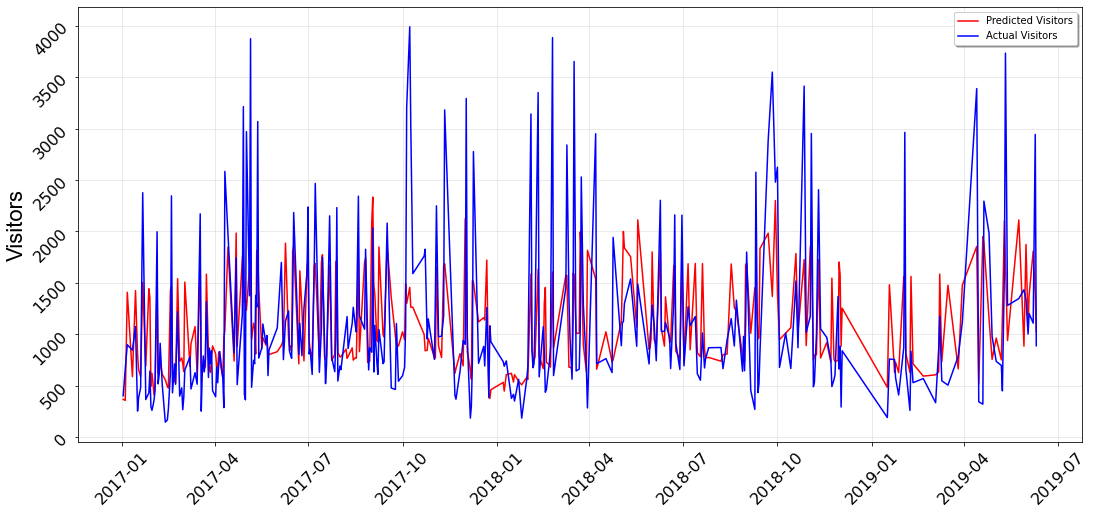

Sample rows:
             Prediction  Actual
Date                           
2017-09-04  1383.776697    1085
2017-10-03   947.533592     678
2017-10-25   843.117877     953
2017-05-02  1233.876959    2971
2017-04-23   881.893065     510
2017-07-18   757.657912     520
2018-04-24   750.775561    1942
2018-05-18  2112.329733    1489
2018-10-14  1064.374186     667
2017-07-12   777.193792     630

rmse 646.2629337908642
std 793.901068849987


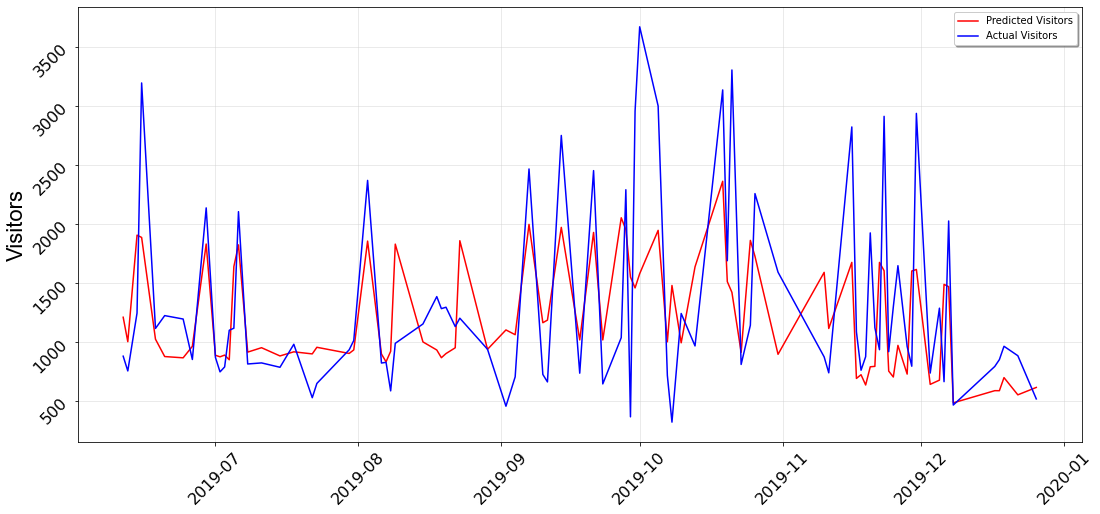

Sample rows:
             Prediction  Actual
Date                           
2019-06-26   964.511580     853
2019-12-17   588.756066     794
2019-06-20   877.963453    1225
2019-07-04   850.699224    1101
2019-06-14  1906.986625    1246
2019-08-08   922.456660     587
2019-07-03   890.335756     790
2019-10-08  1480.549669     322
2019-10-26  1727.445888    2259
2019-08-06   899.638279     823


In [12]:
print(coeffDf)
print()

printRes(resTrain)
print()

printRes(resTest)

                     0
pm10        -250.18008
IsVacation  -197.43731
IsHoliday    446.70013
Temperature  787.79217
is_weekend   906.00186

rmse 634.0007270976848
std 780.967600162725


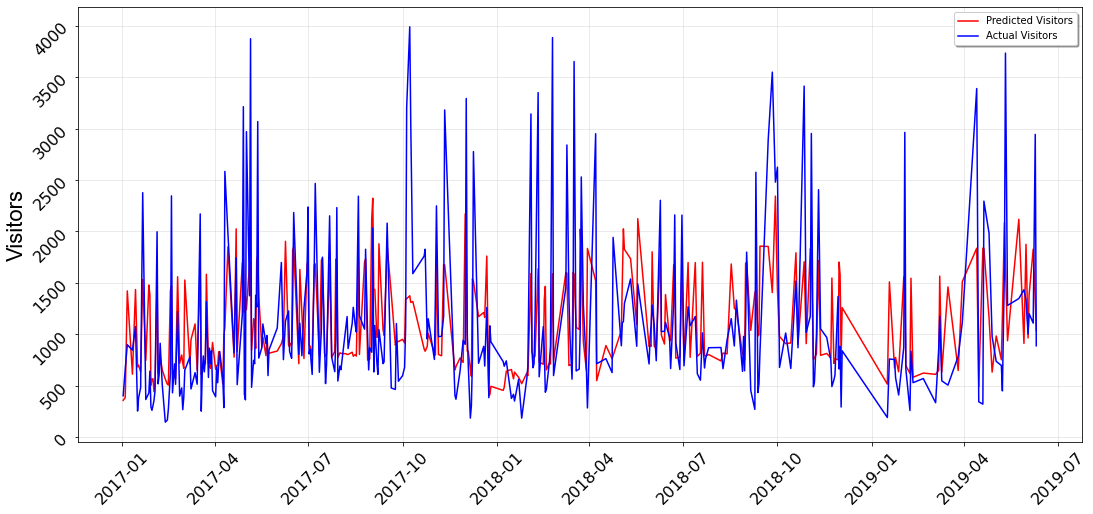

Sample rows:
             Prediction  Actual
Date                           
2019-01-23   670.456349     754
2018-03-23  2022.629210    1053
2017-08-17   787.656273    1021
2018-02-24  1588.051695    3886
2018-02-21   720.999510     733
2017-02-28   798.014494     478
2017-12-02  1755.668671    3294
2018-10-03   978.928835     677
2017-09-01  2123.829792     825
2017-09-25   930.951130    1104

rmse 642.3206346101499
std 793.901068849987


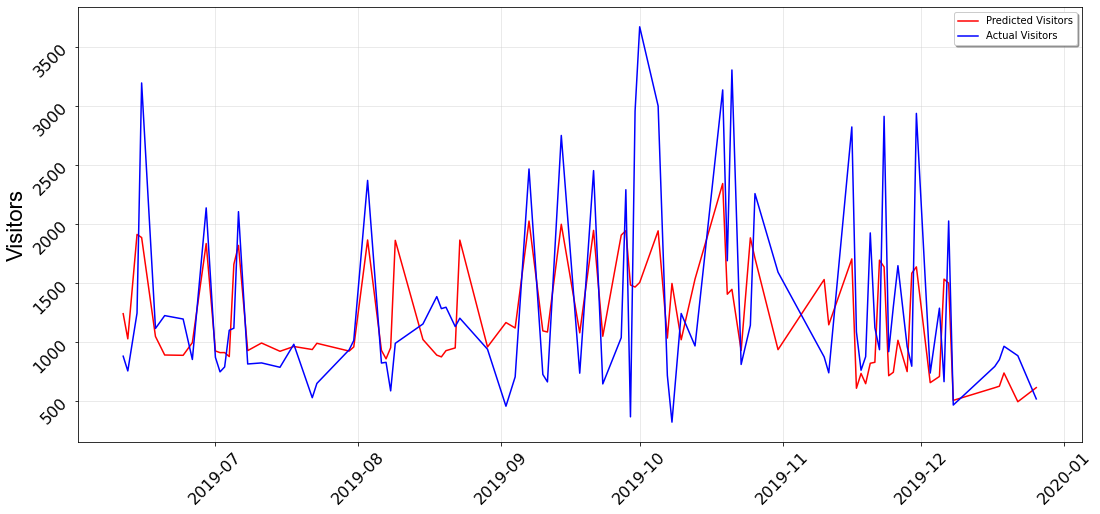

Sample rows:
             Prediction  Actual
Date                           
2019-10-19  2344.433128    3138
2019-09-10  1095.544143     726
2019-10-25  1884.148871    1143
2019-12-08   506.455331     467
2019-12-26   614.622282     519
2019-07-23   990.425176     650
2019-11-20   820.991445    1926
2019-06-18  1048.074859    1116
2019-12-07  1499.767156    2027
2019-10-31   936.414899    1593


In [13]:
resTrain,resTest,coeffDf = mlrModelResTrainTestCoeff(dfWithoutLastYearVisits)
print(coeffDf)
print()

printRes(resTrain)
print()

printRes(resTest)